# Imports & Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crimes = pd.read_csv('resources/filtered/sacramento_crime_2006_filtered.csv')

# Group similar crimes (i.e. different kinds of burglary)
crimes['ucr_ncic_code'].replace({2203: 2299,
                                 2204: 2299,
                                 2303: 2399,
                                 2308: 2399}, inplace=True)

ncic_codes = crimes['ucr_ncic_code']

max_codes = 10
code_count = {}

# Count the number of occurrences for each code
for code in ncic_codes:
    if code in code_count.keys():
        code_count[code] += 1
    else:
        code_count[code] = 1

# Sort the codes by count, descending
code_count = sorted(code_count.items(), key = lambda x: x[1], reverse=True)

# Keep the top 10 most codes
kept_codes = code_count[0:max_codes]

labels = ['Uncategorized', 'Burglary', 'Vehicle Theft', 'Larceny', 'Traffic Accident', 'Property Damage', 'Aggravated Assault', 'Robbery', 'Hit and Run', 'Dangerous Drugs']
values = [kept_codes[i][1] for i in range(max_codes)]
kept_codes = [kept_codes[i][0] for i in range(max_codes)]

# Pie Chart

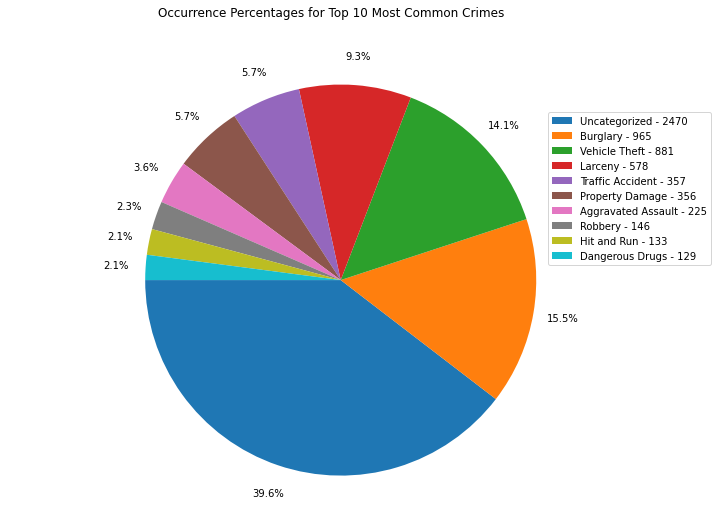

In [27]:
fig, ax = plt.subplots()

fig.suptitle('Occurrence Percentages for Top 10 Most Common Crimes')
fig.set_figwidth(12)
fig.set_figheight(8)

legend_labels = [f'{l} - {v}' for l, v in zip(labels, values)]

ax.pie(values, autopct='%1.1f%%', startangle=180, pctdistance=1.15)
ax.axis('equal')
ax.legend(loc='upper left', labels=legend_labels, bbox_to_anchor=(0.8, 0.9))

fig.savefig('amt_images/type_pie.png', transparent=True, dpi=300)

# Stacked Area

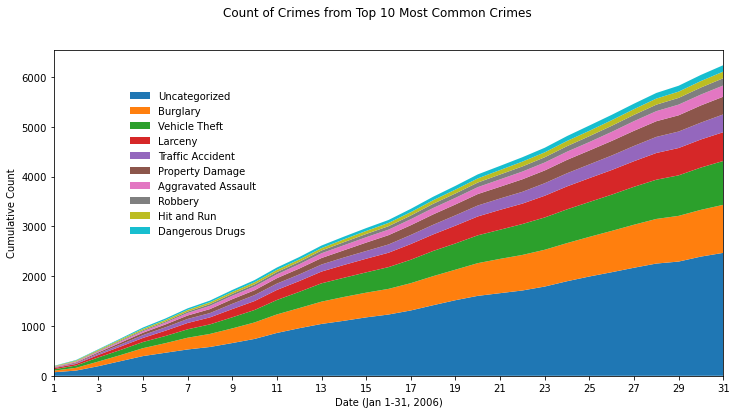

In [28]:
fig, ax = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)
fig.suptitle('Count of Crimes from Top 10 Most Common Crimes')

crimes_filtered = crimes.loc[crimes['ucr_ncic_code'].isin(kept_codes)].copy()

crimes_filtered.replace(to_replace='( )(\d)+(:)(\d){2}', value='', regex=True, inplace=True)

x_vals = [i for i in range(1, 32)]
y_vals = [[] for _ in range(max_codes)]

crimes_current_date = pd.DataFrame(None)

for i in range(max_codes):
    crimes_current_code = crimes_filtered.loc[crimes_filtered['ucr_ncic_code'] == kept_codes[i]]
    current_code_sum = 0
    for j in range(1, 32):
        current_code_sum += len(crimes_current_code.loc[crimes_current_code['cdatetime'] == f'1/{j}/06'])
        y_vals[i].append(current_code_sum)

ax.stackplot(x_vals, y_vals)
ax.set_xlabel('Date (Jan 1-31, 2006)')
ax.set_ylabel('Cumulative Count')

ax.legend(loc='upper left', labels=labels, bbox_to_anchor=(0.1, 0.9), frameon=False)

ax.set_xlim([1, 31])
ax.xaxis.set_ticks(np.arange(1, 32, 2))

fig.savefig('amt_images/type_area.png', transparent=True, dpi=300)